### Ce notebook permet de faire de la reconaissnace de chiffre écrit à la main en utilisant un réseau de neurones convolutif. 


import : 

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Chargement des données MNIST

In [20]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalisation des données pour faciliter l'apprentissage du réseau : 

In [21]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Création d'un modèle simple de réseau de neurones multicouches

In [22]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

C:\Users\pierr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilation du modèle

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Entraînement du modèle

In [24]:
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8521 - loss: 0.5014 - val_accuracy: 0.9665 - val_loss: 0.1262
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9555 - loss: 0.1534 - val_accuracy: 0.9737 - val_loss: 0.0891
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9651 - loss: 0.1125 - val_accuracy: 0.9752 - val_loss: 0.0812
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9735 - loss: 0.0865 - val_accuracy: 0.9767 - val_loss: 0.0755
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9761 - loss: 0.0769 - val_accuracy: 0.9778 - val_loss: 0.0719


Évaluation du modèle

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9688 - loss: 0.0775

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9729 - loss: 0.0877
Test accuracy: 0.9771999716758728


Prédiction et visualisation des résultats

In [26]:
predictions = model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


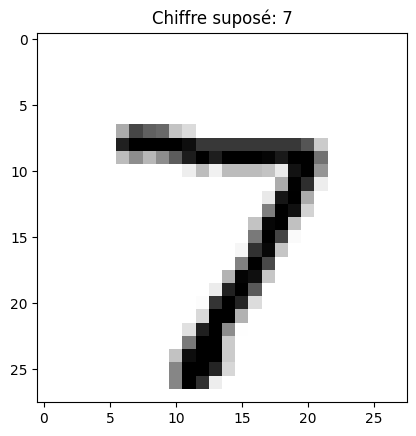

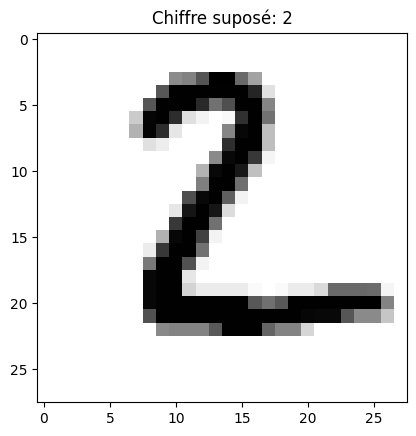

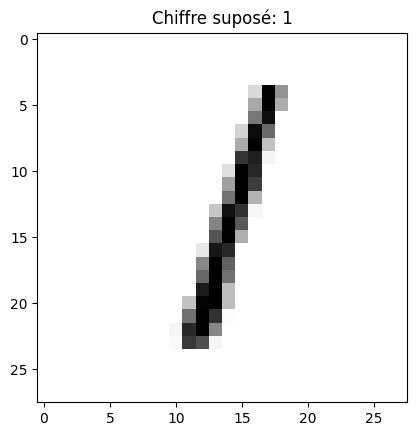

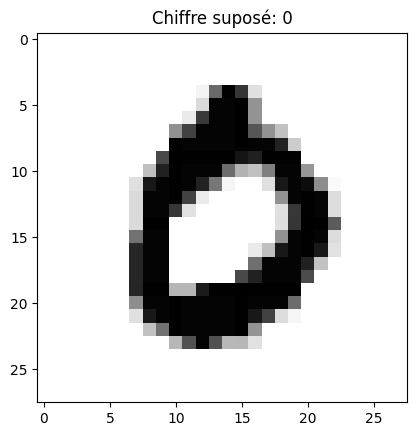

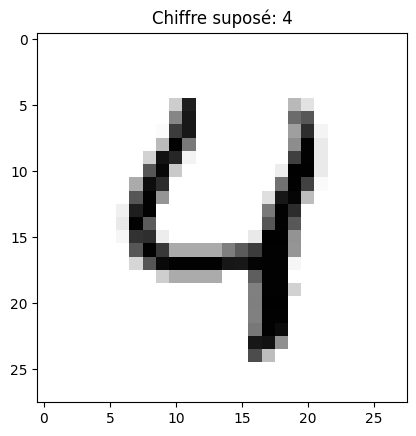

In [27]:
for i, prediction in enumerate(predictions):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Chiffre suposé: {prediction.argmax()}")
    plt.show()

test du code avec des images faites à la main

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


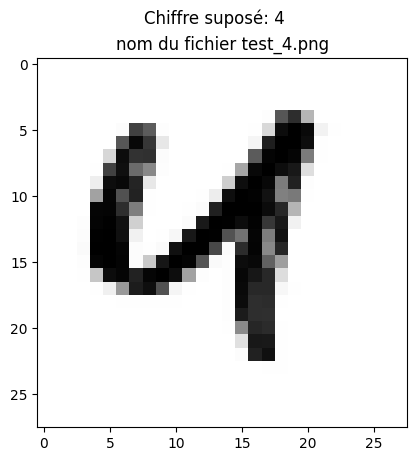

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


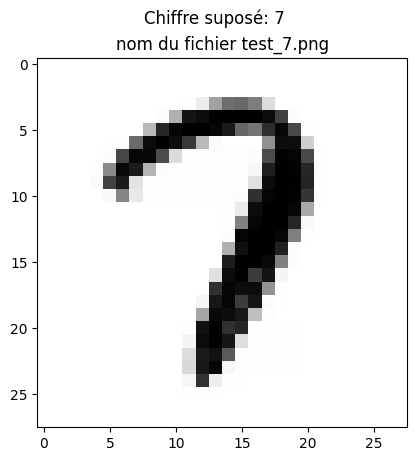

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


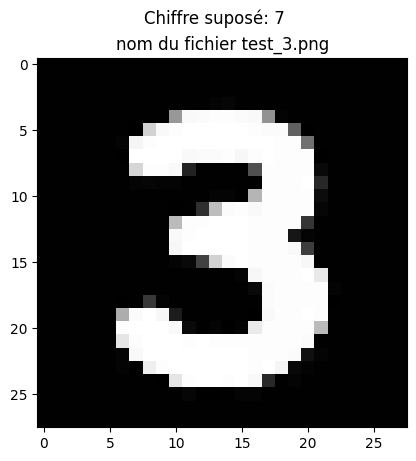

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


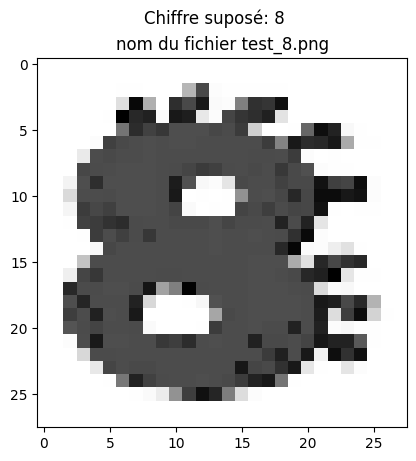

In [31]:
import cv2
import numpy as np

files_name = ['test_4.png', 'test_7.png', 'test_3.png','test_8.png']

for file_name in files_name:
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = np.invert(img)
    img = img / 255.0
    img = img.reshape(1, 28, 28)

    prediction = model.predict(img)
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    plt.suptitle(f"Chiffre suposé: {prediction.argmax()}")
    # sub title is the file name
    plt.title("nom du fichier " + file_name)
    plt.show()
